In [ ]:
# DONT THINK I NEED THIS FILE ANYMORE (GOT GENERATE TAO/SI DATA FILES)

# SI System

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Generate data for u = 0.5 ish

In [2]:
#find tao for u = 0.5 ish

#load csv file
from numpy import genfromtxt
tao_data = genfromtxt('tao_data.csv', delimiter=',') #[t, tao_star_list, T_star_list, us]

for i in range(len(tao_data[3])):
    if tao_data[3][i] >= 0.5:
        print('closest u to 0.5 is: ' , tao_data[3][i])
        print('corresponding tao for that u is: ', tao_data[1][i])
        break



closest u to 0.5 is:  0.5151515151515151
corresponding tao for that u is:  0.58


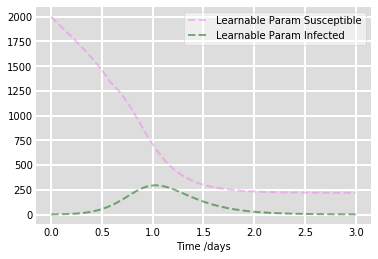

In [6]:
#approximation data

#torch.nn.Sigmoid()(-1e6*(t - self.tao))
import torch

#generate data with u = 0.515151515, tao = 0.58

#vaccination! 

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Initial number of infected individuals, I0
I0 = 1
# Everyone else, S0, is susceptible to infection initially.
S0 = 2000
# Contact rate, beta, and mean recovery rate, mu.
beta, mu = 0.0075, 5
# A grid of time points (in days)
t = np.linspace(0, 3, 100) 
#parameters
u = 0.515151515
tao = 0.58
alpha1 = 1
alpha2 = 0

# The SIR model differential equations.
def deriv(y, t, beta, mu, u, tao, alpha1, alpha2):
    S, I = y
    t = torch.tensor(t)
    tao = torch.tensor(tao)

    dSdt = -beta * S * I + u * torch.nn.Sigmoid()(-1e6*(t-tao)) * alpha1 * (-S)
    dIdt = beta * S * I - mu * I + u * torch.nn.Sigmoid()(-1e6*(t-tao)) * alpha2 * (-I)

    return dSdt, dIdt

#add u = 0.5, get the corresponding tao, generate the SI data
# learn u (self.u), the corresponding tao (self.tao)

# Initial conditions vector
y0 = S0, I0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(beta, mu, u, tao, alpha1, alpha2))
S, I = ret.T

# Plot the data on two separate curves for S(t), I(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S, 'violet', alpha=0.5, lw=2, label='Learnable Param Susceptible', linestyle='dashed')
ax.plot(t, I, 'darkgreen', alpha=0.5, lw=2, label='Learnable Param Infected', linestyle='dashed')
ax.set_xlabel('Time /days')
#ax.set_ylabel('Number (1000s)')
#ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()


In [21]:
#save to csv file
a = np.asarray([t, S, I ]) 

#np.savetxt("vaccination_appx.csv", a, delimiter=",")

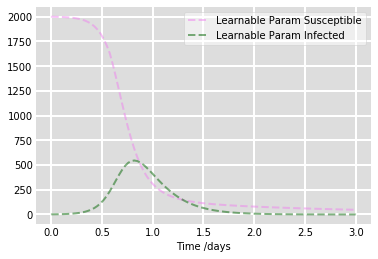

In [3]:
#generate data with u = 0.515151515, tao = 0.58

#vaccination! 

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Initial number of infected individuals, I0
I0 = 1
# Everyone else, S0, is susceptible to infection initially.
S0 = 2000
# Contact rate, beta, and mean recovery rate, mu.
beta, mu = 0.0075, 5
# A grid of time points (in days)
t = np.linspace(0, 3, 100) 
#parameters
u = 0.515151515
tao = 0.58
alpha1 = 1
alpha2 = 0

# The SIR model differential equations.
def deriv(y, t, beta, mu, u, tao, alpha1, alpha2):
    S, I = y
    dSdt = -beta * S * I + u * (t > tao) * alpha1 * (-S)
    dIdt = beta * S * I - mu * I + u * (t > tao) * alpha2 * (-I)
    return dSdt, dIdt

#add u = 0.5, get the corresponding tao, generate the SI data
# learn u (self.u), the corresponding tao (self.tao)

# Initial conditions vector
y0 = S0, I0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(beta, mu, u, tao, alpha1, alpha2))
S, I = ret.T

# Plot the data on two separate curves for S(t), I(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S, 'violet', alpha=0.5, lw=2, label='Learnable Param Susceptible', linestyle='dashed')
ax.plot(t, I, 'darkgreen', alpha=0.5, lw=2, label='Learnable Param Infected', linestyle='dashed')
ax.set_xlabel('Time /days')
#ax.set_ylabel('Number (1000s)')
#ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()


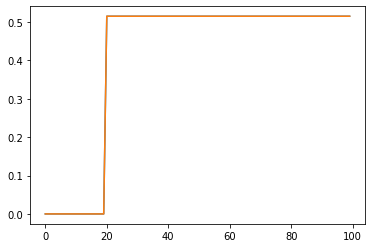

In [22]:
import torch
import numpy as np

u = 0.515151515
tao = 0.58
t = np.linspace(0, 3, 100) 

def fun1(t): 
    val = u * (t > tao)
    return val

def fun2(t): 
    val = u * torch.sigmoid(-1e6*(tao-torch.tensor(t)))
    return val

fun1_values =[]
fun2_values =[]

for timestep in t:
    fun1_values.append(fun1(timestep))
    fun2_values.append(fun2(timestep))


plt.plot(fun1_values)
plt.plot(fun2_values)


In [4]:
#save to csv file
a = np.asarray([t, S, I ]) 

#np.savetxt("tSI_vaccination_data.csv", a, delimiter=",")

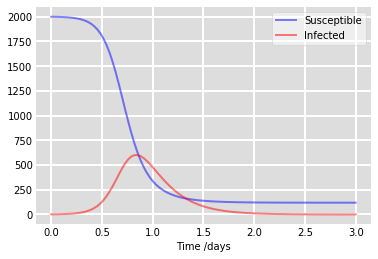

In [2]:
# Total population, N.
#N = 2000
# Initial number of infected individuals, I0
I0 = 1
# Everyone else, S0, is susceptible to infection initially.
S0 = 2000
# Contact rate, beta, and mean recovery rate, mu.
beta, mu = 0.0075, 5
# A grid of time points (in days)
t = np.linspace(0, 3, 100) 

# The SIR model differential equations.
def deriv(y, t, beta, mu):
    S, I = y
    dSdt = -beta * S * I 
    dIdt = beta * S * I - mu * I
    return dSdt, dIdt

# Initial conditions vector
y0 = S0, I0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(beta, mu))
S, I = ret.T

# Plot the data on two separate curves for S(t), I(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
ax.set_xlabel('Time /days')
#ax.set_ylabel('Number (1000s)')
#ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

Save to file

In [3]:
#save to csv file
a = np.asarray([t, S, I ]) 

#np.savetxt("tSI_data.csv", a, delimiter=",")

Load from file

In [4]:
#load csv file
#from numpy import genfromtxt
#csv_file = genfromtxt('SIR_data.csv', delimiter=',')
#csv_file.shape

# Tao + T* (vaccination)

In [5]:
tao_star_list = []
T_star_list = []
T_list = []
tao_list = []

# Initial number of infected individuals, I0
I0 = 1
# Initial number of susceptible individuals, S0
S0 = 2000
# Contact rate, beta, and mean recovery rate, mu.
beta, mu = 0.0075, 5
# A grid of time points (in days)
t = np.linspace(0, 3, 100) 
taos = np.linspace(0,3, 100) #0.1 step size 
us = np.linspace(0,3, 100) #0.1 step size 

epsilon = 0.5

# The SIR model differential equations.
def deriv(y, t, beta, mu, u, tao):
    S, I = y
    dSdt = -beta * S * I - u *(t>=tao) * S  
    dIdt = beta * S * I - mu * I
    return dSdt, dIdt


for u in us:
    for tao in taos:
        # Initial conditions vector
        y0 = S0, I0
        # Integrate the SIR equations over the time grid, t.
        ret = odeint(deriv, y0, t, args=(beta, mu, u, tao))
        S, I = ret.T

        #Ti is 1st time when I<epsilon
        Ti_idx = np.where(I<epsilon)[0][0]
        T_list.append(t[Ti_idx])
        tao_list.append(tao)

    #T_min = minimum over all of the 1st times where I<epsilon 
    T_min = min(T_list)
    idx = T_list.index(T_min) #get the index in order to find the corresponding tao
    T_star_list.append(T_min)
    #tao_star is the corresponding tao for the T_min 
    tao_star = tao_list[idx]
    tao_star_list.append(round(tao_star,2))

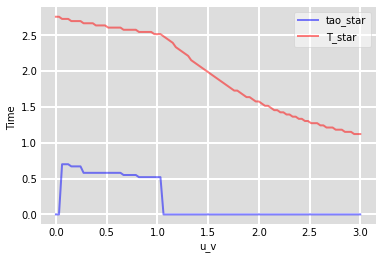

In [6]:
# Plot the data on two separate curves for S(t), I(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, tao_star_list, 'b', alpha=0.5, lw=2, label='tao_star')
ax.plot(t, T_star_list, 'r', alpha=0.5, lw=2, label='T_star')
ax.set_xlabel('u_v')
ax.set_ylabel('Time ')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [7]:
#save to csv file
b = np.asarray([t, tao_star_list, T_star_list, us]) 
#np.savetxt("tao_data.csv", b, delimiter=",")

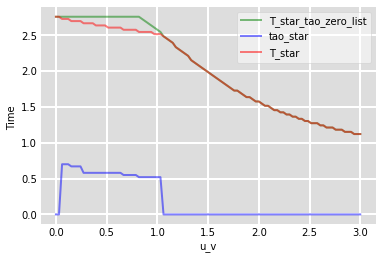

In [8]:
#T when tao = 0 (constant vaccination)

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


T_star_tao_zero_list = []
T_list = []

# Initial number of infected individuals, I0
I0 = 1
# Initial number of susceptible individuals, S0
S0 = 2000
# Contact rate, beta, and mean recovery rate, mu.
beta, mu = 0.0075, 5
# A grid of time points (in days)
t = np.linspace(0, 3, 100) 
#taos = np.zeros(100) #0.1 step size 
tao = 0
us = np.linspace(0,3, 100) #0.1 step size 

epsilon = 0.5

# The SIR model differential equations.
def deriv(y, t, beta, mu, u, tao):
    S, I = y
    dSdt = -beta * S * I - u * S  
    dIdt = beta * S * I - mu * I
    return dSdt, dIdt


for u in us:
    # Initial conditions vector
    y0 = S0, I0
    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(beta, mu, u, tao))
    S, I = ret.T

    #Ti is 1st time when I<epsilon
    Ti_idx = np.where(I<epsilon)[0][0]
    T_list.append(t[Ti_idx])

    #T_min = minimum over all of the 1st times where I<epsilon 
    T_min = min(T_list)
    idx = T_list.index(T_min) #get the index in order to find the corresponding tao
    T_star_tao_zero_list.append(T_min)


# Plot the data on two separate curves for S(t), I(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, T_star_tao_zero_list, 'g', alpha=0.5, lw=2, label='T_star_tao_zero_list')
ax.plot(t, tao_star_list, 'b', alpha=0.5, lw=2, label='tao_star')
ax.plot(t, T_star_list, 'r', alpha=0.5, lw=2, label='T_star')
ax.set_xlabel('u_v')
ax.set_ylabel('Time ')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

# Tao + T* (isolation)

In [16]:
tao_star_list = []
T_star_list = []
T_list = []
tao_list = []

# Initial number of infected individuals, I0
I0 = 1
# Initial number of susceptible individuals, S0
S0 = 2000
# Contact rate, beta, and mean recovery rate, mu.
beta, mu = 0.005, 5
# A grid of time points (in days)
t = np.linspace(0, 12, 50) 
taos = np.linspace(0, 12, 50) #0.1 step size 
us = np.linspace(0, 12, 50) #0.1 step size 

epsilon = 0.5

# The SIR model differential equations.
def deriv(y, t, beta, mu, u, tao):
    S, I = y
    dSdt = -beta * S * I   
    dIdt = beta * S * I - mu * I - u *(t>=tao) * I
    return dSdt, dIdt

count = 0
for u in us:
    #print(f'{count} out of 100')
    count+=1
    for tao in taos:
        # Initial conditions vector
        y0 = S0, I0
        # Integrate the SIR equations over the time grid, t.
        ret = odeint(deriv, y0, t, args=(beta, mu, u, tao))
        S, I = ret.T

        #Ti is 1st time when I<epsilon
        Ti_idx = np.where(I<epsilon)[0][0]
        T_list.append(t[Ti_idx])
        tao_list.append(tao)

    #T_min = minimum over all of the 1st times where I<epsilon 
    T_min = min(T_list)
    idx = T_list.index(T_min) #get the index in order to find the corresponding tao
    T_star_list.append(T_min)
    #tao_star is the corresponding tao for the T_min 
    tao_star = tao_list[idx]
    tao_star_list.append(round(tao_star,2))

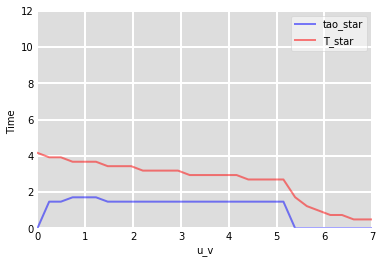

In [18]:
# Plot the data on two separate curves for S(t), I(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, tao_star_list, 'b', alpha=0.5, lw=2, label='tao_star')
ax.plot(t, T_star_list, 'r', alpha=0.5, lw=2, label='T_star')
ax.set_xlabel('u_v')
ax.set_ylabel('Time ')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.set_xlim([0,7])
ax.set_ylim([0,12])
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

# Tao + T* (culling)

In [12]:
tao_star_list = []
T_star_list = []
T_list = []
tao_list = []

# Initial number of infected individuals, I0
I0 = 1
# Initial number of susceptible individuals, S0
S0 = 2000
# Contact rate, beta, and mean recovery rate, mu.
beta, mu = 0.0075, 5
# A grid of time points (in days)
t = np.linspace(0, 3, 100) 
taos = np.linspace(0, 3, 100) #0.1 step size 
us = np.linspace(0, 3, 100) #0.1 step size 

epsilon = 0.5

# The SIR model differential equations.
def deriv(y, t, beta, mu, u, tao):
    S, I = y
    dSdt = -beta * S * I - u *(t>=tao) * S
    dIdt = beta * S * I - mu * I - u *(t>=tao) * I
    return dSdt, dIdt

count = 0
for u in us:
    #print(f'{count} out of 100')
    count+=1
    for tao in taos:
        # Initial conditions vector
        y0 = S0, I0
        # Integrate the SIR equations over the time grid, t.
        ret = odeint(deriv, y0, t, args=(beta, mu, u, tao))
        S, I = ret.T

        #Ti is 1st time when I<epsilon
        Ti_idx = np.where(I<epsilon)[0][0]
        T_list.append(t[Ti_idx])
        tao_list.append(tao)

    #T_min = minimum over all of the 1st times where I<epsilon 
    T_min = min(T_list)
    idx = T_list.index(T_min) #get the index in order to find the corresponding tao
    T_star_list.append(T_min)
    #tao_star is the corresponding tao for the T_min 
    tao_star = tao_list[idx]
    tao_star_list.append(round(tao_star,2))

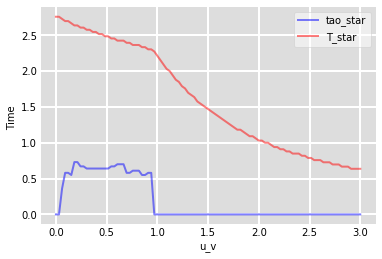

In [13]:
# Plot the data on two separate curves for S(t), I(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, tao_star_list, 'b', alpha=0.5, lw=2, label='tao_star')
ax.plot(t, T_star_list, 'r', alpha=0.5, lw=2, label='T_star')
ax.set_xlabel('u_v')
ax.set_ylabel('Time ')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
#ax.set_xlim([0,7])
#ax.set_ylim([0,12])
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

# Tao + T* (reduction)

In [56]:
tao_star_list = []
T_star_list = []
T_list = []
tao_list = []

# Initial number of infected individuals, I0
I0 = 1
# Initial number of susceptible individuals, S0
S0 = 2000
# Contact rate, beta, and mean recovery rate, mu.
beta, mu = 0.005, 5
# A grid of time points (in days)
t = np.linspace(0, 20, 300) 
taos = np.linspace(0, 20, 300) #0.1 step size 
us = np.linspace(0, 20, 300) #0.1 step size 

epsilon = 0.5

# The SIR model differential equations.
def deriv(y, t, beta, mu, u, tao):
    S, I = y
    dSdt = -beta * S * I - u *(t>=tao) * beta * S * I
    dIdt = beta * S * I - mu * I - u *(t>=tao) * beta * S * I
    return dSdt, dIdt

count = 0
for u in us:
    #print(f'{count} out of 100')
    count+=1
    for tao in taos:
        # Initial conditions vector
        y0 = S0, I0
        # Integrate the SIR equations over the time grid, t.
        ret = odeint(deriv, y0, t, args=(beta, mu, u, tao))
        S, I = ret.T

        #Ti is 1st time when I<epsilon
        Ti_idx = np.where(I<epsilon)[0][0]
        T_list.append(t[Ti_idx])
        tao_list.append(tao)

    #T_min = minimum over all of the 1st times where I<epsilon 
    T_min = min(T_list)
    idx = T_list.index(T_min) #get the index in order to find the corresponding tao
    T_star_list.append(T_min)
    #tao_star is the corresponding tao for the T_min 
    tao_star = tao_list[idx]
    tao_star_list.append(round(tao_star,2))

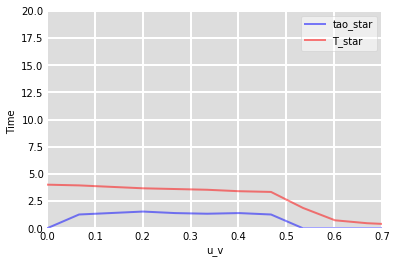

In [57]:
# Plot the data on two separate curves for S(t), I(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, tao_star_list, 'b', alpha=0.5, lw=2, label='tao_star')
ax.plot(t, T_star_list, 'r', alpha=0.5, lw=2, label='T_star')
ax.set_xlabel('u_v')
ax.set_ylabel('Time ')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.set_xlim([0,0.7])
ax.set_ylim([0,20])
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()